# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import seaborn as sns
sns.set_theme(style="whitegrid")

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls

In [3]:
# Use this variable for testing only (replace "cities with cities2 in for loop")
# cities2 = ['dharan', 'ornskoldsvik', 'bucksport', 'lasa', 'barabai', 'vikhorevka', 'saint-gilles', 'barra do garcas', 'cermik', 'igbo ora', 'taolanaro', 'illoqqortoormiut', 'alotau', 'albany', 'sentyabrskiy', 'hamilton', 'port alfred', 'port hardy', 'hithadhoo', 'barrow','butaritari','faanui','hermanus','puerto ayora','jamestown', 'nefteyugansk']

In [3]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query url. Test first by appending one city name to the end of f-string. Test get and json-ify.
query_url = f"{weather_url}appid={weather_api_key}&units={units}&q="

In [4]:
# Loop through each city in cities list (randomly put in list by starter code) and append to open lists. 
# Loop generates respons and json_ifies each response

name = []
city_id = []
lat = []
lon = []
temperature = []
humidity = []
cloudiness = []
windspeed = []
date = []
country = []

counter = 0

for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windspeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        print(f"{city} city number {counter} of {len(cities)} has been located.")
        counter += 1

    except (KeyError, IndexError):
        print(f"Missing data for city number {counter} of {len(cities)}.")
        counter += 1
    
    time.sleep(1)     

riyadh city number 0 of 601 has been located.
chokurdakh city number 1 of 601 has been located.
rikitea city number 2 of 601 has been located.
busselton city number 3 of 601 has been located.
albany city number 4 of 601 has been located.
comodoro rivadavia city number 5 of 601 has been located.
port-gentil city number 6 of 601 has been located.
ushuaia city number 7 of 601 has been located.
arraial do cabo city number 8 of 601 has been located.
leningradskiy city number 9 of 601 has been located.
samarai city number 10 of 601 has been located.
hilo city number 11 of 601 has been located.
Missing data for city number 12 of 601.
iroquois falls city number 13 of 601 has been located.
lorengau city number 14 of 601 has been located.
punta arenas city number 15 of 601 has been located.
victoria city number 16 of 601 has been located.
lagoa city number 17 of 601 has been located.
nikolskoye city number 18 of 601 has been located.
castro city number 19 of 601 has been located.
touros city num

Missing data for city number 167 of 601.
iqaluit city number 168 of 601 has been located.
peleduy city number 169 of 601 has been located.
simoes city number 170 of 601 has been located.
tuktoyaktuk city number 171 of 601 has been located.
kalianget city number 172 of 601 has been located.
te anau city number 173 of 601 has been located.
kavali city number 174 of 601 has been located.
at-bashi city number 175 of 601 has been located.
Missing data for city number 176 of 601.
strezhevoy city number 177 of 601 has been located.
otumba city number 178 of 601 has been located.
bhatkal city number 179 of 601 has been located.
olafsvik city number 180 of 601 has been located.
urengoy city number 181 of 601 has been located.
saku city number 182 of 601 has been located.
belmonte city number 183 of 601 has been located.
benghazi city number 184 of 601 has been located.
auki city number 185 of 601 has been located.
kruisfontein city number 186 of 601 has been located.
terra santa city number 187

ahipara city number 333 of 601 has been located.
cabinda city number 334 of 601 has been located.
krasnoselkup city number 335 of 601 has been located.
zhigansk city number 336 of 601 has been located.
pandamatenga city number 337 of 601 has been located.
waingapu city number 338 of 601 has been located.
khatanga city number 339 of 601 has been located.
verkhoyansk city number 340 of 601 has been located.
manadhoo city number 341 of 601 has been located.
flinders city number 342 of 601 has been located.
tocopilla city number 343 of 601 has been located.
Missing data for city number 344 of 601.
napier city number 345 of 601 has been located.
carora city number 346 of 601 has been located.
itarema city number 347 of 601 has been located.
hobyo city number 348 of 601 has been located.
challapata city number 349 of 601 has been located.
ler city number 350 of 601 has been located.
cockburn town city number 351 of 601 has been located.
Missing data for city number 352 of 601.
nawabganj city

warren city number 500 of 601 has been located.
Missing data for city number 501 of 601.
umred city number 502 of 601 has been located.
praia da vitoria city number 503 of 601 has been located.
cheremukhovo city number 504 of 601 has been located.
hualmay city number 505 of 601 has been located.
omboue city number 506 of 601 has been located.
wellington city number 507 of 601 has been located.
kalanguy city number 508 of 601 has been located.
tukrah city number 509 of 601 has been located.
turbat city number 510 of 601 has been located.
ust-kuyga city number 511 of 601 has been located.
husavik city number 512 of 601 has been located.
Missing data for city number 513 of 601.
kopervik city number 514 of 601 has been located.
peace river city number 515 of 601 has been located.
piombino city number 516 of 601 has been located.
Missing data for city number 517 of 601.
camabatela city number 518 of 601 has been located.
nanning city number 519 of 601 has been located.
taoudenni city number

In [6]:
# Convert Raw Data to DataFrame
city_data_df = pd.DataFrame({"City":name, "Country":country, "Latitude":lat, "Longitude":lon, "Max Temperature (F)":temperature, "Humidity (%)":humidity, "Cloud Cover (%)":cloudiness, "Wind Speed (mph)":windspeed, "Date":date})
city_data_df.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Riyadh,SA,24.6877,46.7219,86.00,23,0,4.61,1616150736
1,Chokurdakh,RU,70.6333,147.9167,-23.15,76,18,8.30,1616150738
2,Rikitea,PF,-23.1203,-134.9692,80.40,77,100,15.86,1616150536
3,Busselton,AU,-33.6500,115.3333,74.14,50,93,4.32,1616150740
4,Albany,US,42.6001,-73.9662,24.01,32,82,4.00,1616150618


In [7]:
# Inspect the data and remove the cities where the humidity > 100%.
clean_city_data_df = city_data_df[city_data_df["Humidity (%)"] <= 100]
clean_city_data_df

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Riyadh,SA,24.6877,46.7219,86.00,23,0,4.61,1616150736
1,Chokurdakh,RU,70.6333,147.9167,-23.15,76,18,8.30,1616150738
2,Rikitea,PF,-23.1203,-134.9692,80.40,77,100,15.86,1616150536
3,Busselton,AU,-33.6500,115.3333,74.14,50,93,4.32,1616150740
4,Albany,US,42.6001,-73.9662,24.01,32,82,4.00,1616150618
...,...,...,...,...,...,...,...,...,...
543,Nigrita,GR,40.9053,23.4994,48.00,59,90,5.99,1616151505
544,Mayumba,GA,-3.4320,10.6554,78.64,83,99,5.91,1616151506
545,Chernyshevskiy,RU,63.0128,112.4714,14.00,90,100,6.67,1616151508
546,Byron Bay,AU,-28.6500,153.6167,73.40,88,75,4.61,1616151509


In [8]:
# Export the cleaned data dataframe to a csv for later use.
clean_city_data_df.to_csv("../Resources/city_data.csv", header=True)

## Latitude vs. Temperature Plot

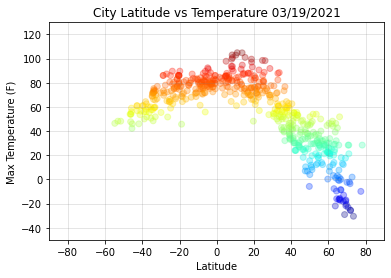

In [9]:
# To convert the access date: https://www.tutorialspoint.com/python/time_strftime.htm
# https://medium.com/better-programming/how-to-use-colormaps-with-matplotlib-to-create-colorful-plots-in-python-969b5a892f0c
# https://matplotlib.org/examples/color/colormaps_reference.html

plt.title(f'City Latitude vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-50, 130)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], alpha= 0.3, c = clean_city_data_df["Max Temperature (F)"], cmap = "jet", marker="o")

# Save the plot to png
plt.savefig("../Images/LatTemp.png")

plt.show()

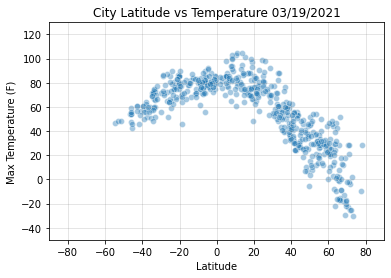

In [38]:
plt.title(f'City Latitude vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-50, 130)
# plt.figure(figsize=(6.5,6.5))

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Max Temperature (F)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../Images/LatTemp.png")
plt.show()

##  Latitude vs. Humidity Plot

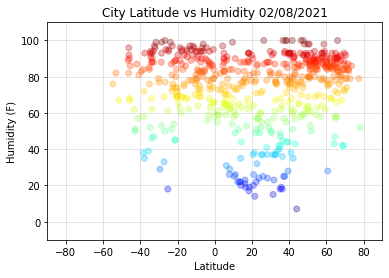

In [11]:
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], alpha= 0.3, c = clean_city_data_df["Humidity (%)"], cmap = "jet", marker="o")

# Save the plot to png
plt.savefig("../Images/LatHum.png")

plt.show()

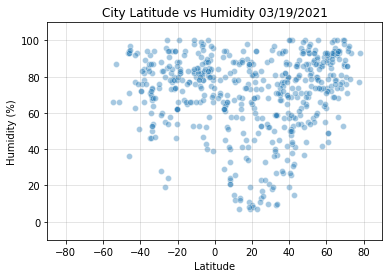

In [39]:
plt.title(f'City Latitude vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (F)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Humidity (%)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../Images/LatHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

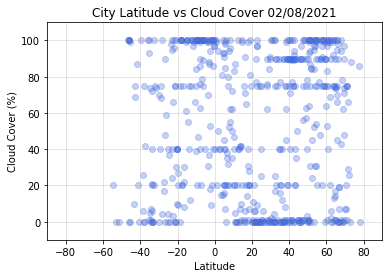

In [12]:
plt.title(f'City Latitude vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
plt.savefig("../Images/LatCloud.png")

plt.show()

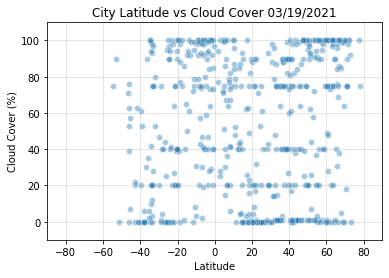

In [40]:
plt.title(f'City Latitude vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-10, 110)

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Cloud Cover (%)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../Images/LatCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

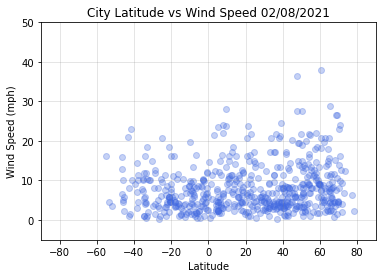

In [13]:
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-5, 50)

plt.scatter(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], color = "royalblue", alpha= 0.3, marker="o")

# Save the plot to png
plt.savefig("../Images/LatWind.png")

plt.show()

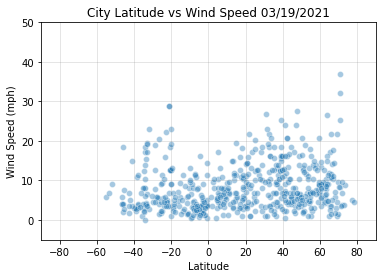

In [44]:
plt.title(f'City Latitude vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.xlim(-90,90)
plt.ylim(-5, 50)

sns_scatter = sns.scatterplot(clean_city_data_df["Latitude"], clean_city_data_df["Wind Speed (mph)"], alpha= 0.4)

# Save the plot to png
fig = sns_scatter.get_figure()
fig.savefig("../Images/LatWind.png")
plt.show()

## Linear Regression

In [14]:
# Find the cities in the northern hemisphere
north_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] > 0]
north_cities.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
1,Cherskiy,RU,68.7500,161.3000,6.89,84,62,7.58,1612845715
3,Shiyan,CN,32.6475,110.7781,50.00,37,100,1.01,1612845718
6,Hasaki,JP,35.7333,140.8333,48.00,19,20,17.27,1612845497
7,Kapaa,US,22.0752,-159.3190,69.80,78,90,14.97,1612845723
8,Phan Thiet,VN,10.9333,108.1000,86.23,49,0,10.60,1612845594


In [15]:
# Find the cities in the southern hemisphere
south_cities = clean_city_data_df.loc[clean_city_data_df["Latitude"] <= 0]
south_cities.head()

,City,Country,Latitude,Longitude,Max Temperature (F),Humidity (%),Cloud Cover (%),Wind Speed (mph),Date
0,Bredasdorp,ZA,-34.5322,20.0403,57.20,94,5,1.14,1612845468
2,Vaini,TO,-21.2000,-175.2000,80.60,89,75,18.41,1612845716
4,Kikwit,CD,-5.0410,18.8162,71.22,90,100,2.21,1612845720
5,Cape Town,ZA,-33.9258,18.4232,69.01,88,20,16.11,1612845475
10,São Félix do Xingu,BR,-6.6447,-51.9950,72.97,96,100,1.77,1612845727


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

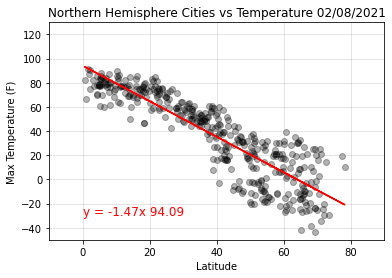

The r-squared value is 0.7803747378312963.


In [16]:
# Set the x and y limits for each graph to include min and max latitude because it is unknow what cities will be
# determined in the random sampling.
x_values = north_cities["Latitude"]
y_values = north_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NTemp.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

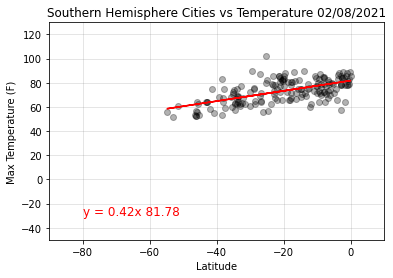

The r value is 0.5911126272870073.
The r-squared value is 0.3494141381381484.


In [17]:
x_values = south_cities["Latitude"]
y_values = south_cities["Max Temperature (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-50, 130)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,-30), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/STemp.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

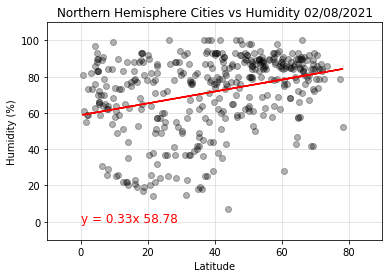

The r value is 0.3165134355679596.
The r-squared value is 0.1001807548950329.


In [18]:
x_values = north_cities["Latitude"]
y_values = north_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,0), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NHum.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

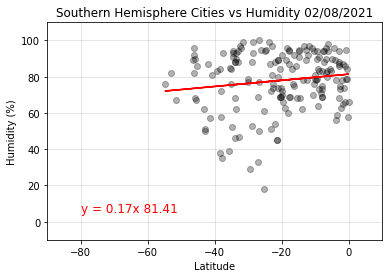

The r value is 0.1455535074087075.
The r-squared value is 0.021185823518976674.


In [19]:
x_values = south_cities["Latitude"]
y_values = south_cities["Humidity (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/SHum.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

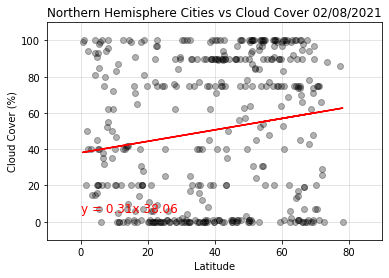

The r value is 0.1626319016122936.
The r-squared value is 0.026449135422030746.


In [20]:
x_values = north_cities["Latitude"]
y_values = north_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NCloud.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

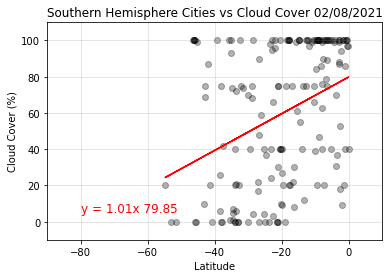

The r value is 0.3611125354895502.
The r-squared value is 0.13040226328769164.


In [21]:
x_values = south_cities["Latitude"]
y_values = south_cities["Cloud Cover (%)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Cloud Cover {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloud Cover (%)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-10, 110)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,5), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/SCloud.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

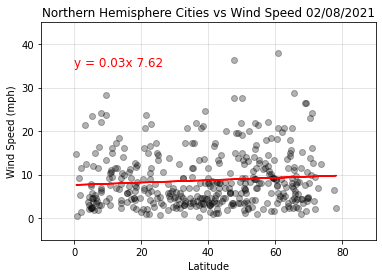

The r value is 0.08745431284364617.
The r-squared value is 0.007648256834954336.


In [22]:
x_values = north_cities["Latitude"]
y_values = north_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Northern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-10,90)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (0,35), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/NWind.png")

plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

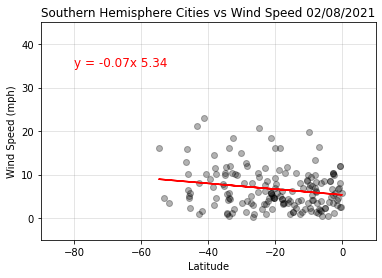

The r value is -0.195017819613677.
The r-squared value is 0.03803194996687267.


In [23]:
x_values = south_cities["Latitude"]
y_values = south_cities["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = "y = " + str(round(slope,2)) + "x " + str(round(intercept,2))

plt.title(f'Southern Hemisphere Cities vs Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,10)
plt.ylim(-5, 45)
plt.grid(True, linestyle="-", which="major", color="gray", alpha = 0.25)
plt.annotate(line_eq, (-80,35), fontsize = 12, color = "red")

plt.scatter(x_values, y_values, color="black", alpha=0.3, marker="o")
plt.plot(x_values, regress_values, "r-")

# Save the plot to png
plt.savefig("../Images/SWind.png")
plt.show()

r = rvalue
r2 = r**2
print(f"The r value is {r}.")
print(f"The r-squared value is {r2}.")